In [29]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\Desktop\flickr8k\flickr8k.token.txt",header=None,delimiter='\n')
df.head()

,0
0,1000268201_693b08cb0e.jpg#0\tA child in a pink...
1,1000268201_693b08cb0e.jpg#1\tA girl going into...
2,1000268201_693b08cb0e.jpg#2\tA little girl cli...
3,1000268201_693b08cb0e.jpg#3\tA little girl cli...
4,1000268201_693b08cb0e.jpg#4\tA little girl in ...


In [30]:
df.shape
df[0][0]

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .'

In [31]:
desc={}
for x in df[0]:
        first,second=x.split('\t')
        img_name=first.split(".")[0]
        
        if desc.get(img_name) is None :
            desc[img_name]= []
                
        desc[img_name].append(second)    

In [32]:
type(desc)

dict

In [33]:
desc["1000268201_693b08cb0e"]


['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [34]:
import re
def clean_text(sentence):
    sentence= sentence.lower()
    sentence=re.sub("[^a-z]+"," ",sentence)
    sentence=sentence.split()
    
    sentence= [s for s in sentence if len(s)>1]
    sentence= " ".join(sentence)
    return sentence
    
    
    


In [35]:
clean_text("A cat is sitting on house # 4")

'cat is sitting on house'

In [36]:
dir(desc.items())

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'isdisjoint']

In [37]:
for key,caption_list in desc.items():
    for i in range(len(caption_list)):
        caption_list[i]=clean_text(caption_list[i])

In [38]:
desc["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [39]:
with open("desc.txt","w") as f:
    f.write(str(desc))

In [40]:
import json
descriptions= {}
with open("desc.txt","r") as f:
    descriptions=f.read()
json_acceptable_string=descriptions.replace("'","\"")
descriptions=json.loads(json_acceptable_string)

In [41]:
print(type(descriptions))

<class 'dict'>


In [42]:
# dir(descriptions)

In [43]:
vocab= set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
    
print("Vocab Size: %d"%len(vocab))    

Vocab Size: 8424


In [44]:
total_words=[]
for key in descriptions.keys():
    [total_words.append(i) for des in descriptions[key] for i in des.split()]
    
print("Total Words : %d"%len(total_words))    
    

Total Words : 373837


In [45]:
import collections

counter= collections.Counter(total_words)
freq_count = dict(counter)
print(len(freq_count.keys()))

8424


In [46]:
sorted_freq_count= sorted(freq_count.items(),reverse=True,key=lambda x: x[1])

sorted_freq_count= [x for x in sorted_freq_count if x[1]>10]

In [47]:
sorted_freq_count

[('in', 18987),
 ('the', 18420),
 ('on', 10746),
 ('is', 9345),
 ('and', 8863),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7275),
 ('of', 6723),
 ('two', 5643),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3505),
 ('woman', 3403),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2916),
 ('people', 2887),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('through', 2032),
 ('playing', 2008),
 ('while', 1968),
 ('shirt', 1962),
 ('down', 1843),
 ('standing', 1789),
 ('ball', 1783),
 ('little', 1768),
 ('grass', 1622),
 ('snow', 1547),
 ('child', 1545),
 ('person', 1542),
 ('jumping', 1473),
 ('over', 1415),
 ('three', 1389),
 ('front', 1386),
 ('sitting', 1368),
 ('holding', 1324),
 ('up', 1302),
 ('field', 1283),
 ('small', 1278),
 ('by', 1249),
 ('large', 1237),
 ('green', 1234),
 ('one', 1223),
 ('group', 1218),
 ('yellow', 1217),
 ('her', 1178),
 ('walk

In [48]:
total_words=[x[0] for x in sorted_freq_count ]
print(len(total_words))

1845


In [49]:
train_data_file= None
with open(r"C:\Users\hp\Desktop\flickr8k\flickr_8k.trainImages.txt","r") as f:
    train_data_file=f.read()
    

In [50]:
test_data_file=None
with open(r"C:\Users\hp\Desktop\flickr8k\flickr_8k.testImages.txt","r") as f:
    test_data_file=f.read()

In [43]:
print(train_data_file)

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
3535879138_9281d

In [51]:
train=[row.split(".")[0] for row in train_data_file.split("\n")[:-1]]

In [52]:
test=[row.split(".")[0] for row in test_data_file.split("\n")[:-1]]

In [46]:
train[:10]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154']

In [53]:
train_descriptions={}
for img_id in train:
    train_descriptions[img_id]=[]
    for cap in descriptions[img_id]:
        cap_to_append="startseq " + cap + " endseq"
        train_descriptions[img_id].append(cap_to_append)

In [54]:
import keras
from keras.applications.resnet50 import ResNet50,preprocess_input

In [55]:
model= ResNet50(weights="imagenet",input_shape=(224,224,3))


In [12]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_add_unique_metric_name',
 '_base_init',
 '_built',
 '_cache_output_metric_attributes',
 '_check_trainable_weights_consistency',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_get_callback_model',
 '_get_existing_metric',
 '_get_node_attribute_at_index',
 '_get_training_eval_metrics',
 '_handle_metrics',
 '_handle_per_output_metrics',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinates',
 '_input_layers',
 '_is_compiled',


In [13]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [14]:
from keras.models import Model,load_model
model_new= Model(model.input,model.layers[-2].output)

In [16]:
import keras
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import numpy as np
def preprocess_img(img):
    img=image.load_img(img,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    
    img=preprocess_input(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


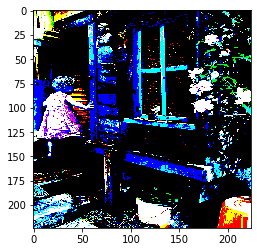

[[[[ -30.939003   -61.779      -67.68     ]
   [  13.060997     6.2210007  -17.68     ]
   [  34.060997    32.221        5.3199997]
   ...
   [ -99.939     -116.779     -118.68     ]
   [ -98.939     -111.779     -118.68     ]
   [-101.939     -108.779     -120.68     ]]

  [[ -36.939003   -68.779      -72.68     ]
   [  21.060997     9.221001   -13.68     ]
   [  38.060997    37.221        8.32     ]
   ...
   [ -94.939     -104.779     -113.68     ]
   [ -93.939     -108.779     -116.68     ]
   [ -90.939      -86.779     -102.68     ]]

  [[ -39.939003   -74.779      -76.68     ]
   [  26.060997    13.221001    -9.68     ]
   [  41.060997    36.221        6.3199997]
   ...
   [ -99.939     -107.779     -115.68     ]
   [-101.939     -107.779     -121.68     ]
   [ -95.939     -101.779     -123.68     ]]

  ...

  [[ -27.939003    56.221      107.32     ]
   [ -92.939      -49.779       20.32     ]
   [ -49.939003   -13.778999    35.32     ]
   ...
   [ 150.061      132.22101    126.

In [19]:

IMG_PATH="C:/Users/hp/Desktop/flickr8k/Images/"
img= preprocess_img(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.show()
print(img)


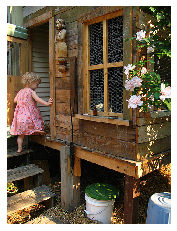

[[[ 58  56  77]
  [115 131 130]
  [106 123 117]
  ...
  [  4   4   2]
  [  4   4   2]
  [  6   6   4]]

 [[ 56  55  73]
  [115 132 126]
  [106 123 117]
  ...
  [  5   5   5]
  [ 12  17  13]
  [  3   8   2]]

 [[ 52  51  69]
  [115 130 123]
  [108 125 119]
  ...
  [ 10  11   6]
  [  7   9   6]
  [  2   4   3]]

 ...

 [[193  78  11]
  [221 154  41]
  [243 244 116]
  ...
  [170 185 204]
  [169 184 205]
  [168 185 193]]

 [[187  88  31]
  [252 239 137]
  [255 196  99]
  ...
  [170 186 202]
  [169 184 203]
  [170 184 193]]

 [[200 100  25]
  [199 106  26]
  [166  66   6]
  ...
  [170 186 201]
  [167 184 200]
  [169 183 192]]]


In [18]:
IMG_PATH="C:/Users/hp/Desktop/flickr8k/Images/"
import cv2
import matplotlib.pyplot as plt

img=cv2.imread(IMG_PATH+"1000268201_693b08cb0e.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
print(img)

In [57]:
def encode_image(img):
    img= preprocess_img(img)
    feature_vector= model_new.predict(img)
    feature_vector=feature_vector.reshape((2048,))
    #print(feature_vector.shape)
    return feature_vector
            


In [58]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

array([0.041543  , 0.17076081, 0.292786  , ..., 0.05089618, 0.3132235 ,
       0.8600756 ], dtype=float32)

In [59]:
from time import time
start = time()
encoding_train = {}

for ix,img_id in enumerate(train):
    img_path= IMG_PATH+ "/"+img_id+ ".jpg"
    encoding_train[img_id]=encode_image(img_path)
    
    if ix%100==0:
        print("Encoding in progress Time Step %d"%ix)
        
end_t= time()
print("Total time taken : ",end_t-start)


Encoding in progress Time Step 0
Encoding in progress Time Step 100
Encoding in progress Time Step 200
Encoding in progress Time Step 300
Encoding in progress Time Step 400
Encoding in progress Time Step 500
Encoding in progress Time Step 600
Encoding in progress Time Step 700
Encoding in progress Time Step 800
Encoding in progress Time Step 900
Encoding in progress Time Step 1000
Encoding in progress Time Step 1100
Encoding in progress Time Step 1200
Encoding in progress Time Step 1300
Encoding in progress Time Step 1400
Encoding in progress Time Step 1500
Encoding in progress Time Step 1600
Encoding in progress Time Step 1700
Encoding in progress Time Step 1800
Encoding in progress Time Step 1900
Encoding in progress Time Step 2000
Encoding in progress Time Step 2100
Encoding in progress Time Step 2200
Encoding in progress Time Step 2300
Encoding in progress Time Step 2400
Encoding in progress Time Step 2500
Encoding in progress Time Step 2600
Encoding in progress Time Step 2700
Enco

In [60]:
import pickle
with open("encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [61]:
start = time()
encoding_test = {}

for ix,img_id in enumerate(test):
    img_path= IMG_PATH+ "/"+img_id+ ".jpg"
    encoding_test[img_id]=encode_image(img_path)
    
    if ix%100==0:
        print("Encoding in progress Time Step %d"%ix)
        
end_t= time()
print("Total time taken(test) : ",end_t-start)

Encoding in progress Time Step 0
Encoding in progress Time Step 100
Encoding in progress Time Step 200
Encoding in progress Time Step 300
Encoding in progress Time Step 400
Encoding in progress Time Step 500
Encoding in progress Time Step 600
Encoding in progress Time Step 700
Encoding in progress Time Step 800
Encoding in progress Time Step 900
Total time taken(test) :  373.96534490585327


In [62]:
with open("encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_test,f)

In [66]:
word_to_idx={}
idx_to_word={}

for i,word in enumerate(total_words):
    word_to_idx[word]=i+1
    idx_to_word[i+1]=word
    

In [67]:
word_to_idx["dog"]

6

In [68]:
idx_to_word[6]

'dog'

In [70]:
print(len(idx_to_word))

1845


In [71]:
idx_to_word[1846] ='startseq'
word_to_idx['startseq']=1846

idx_to_word[1847] ='endseq'
word_to_idx['endseq']=1847

vocab_size= len(word_to_idx)+ 1
print("VOCAB SIZE : ",vocab_size)




VOCAB SIZE :  1848


In [73]:
max_len=0
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len=max(max_len,len(cap.split()))
        
print(max_len)

35


In [94]:
from keras.utils import to_categorical 
from keras.preprocessing.sequence import pad_sequences
def data_generator(train_descriptions,encoding_train,word_to_idx,mex_len,batch_size):
    x1,x2,y=[],[],[]
    
    
    n=0
    while True:
        for key,desc_list in train_descriptions.items():
            n+=1
            
            photo = encoding_train[key+".jpg"]
            for desc in desc_list:
                
                seq=[word_to_idx[word] for word in desc.split() if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi= seq[0:i]
                    yi= seq[i]
                    
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categorical([yi],num_classes=vocab_size)[0]
                    
                    x1,append(photo)
                    x2.append(xi)
                    y.append(yi)
                    
                    
                if n==batch_size:
                    yield([np.array(x1),np.array(x2)],np.array(y))
                    x1,x2,y= [],[],[]
                    n=0
                    
            
            

In [80]:
f = open(r"C:\Users\hp\Desktop\flickr8k\archive (1)\glove.6B.50d.txt",encoding='utf8')

In [84]:
f.close()

In [81]:
embedding_index= {}

for line in f:
    values = line.split()
    
    word= values[0]
    word_embedding= np.array(values[1:],dtype='float')
    embedding_index[word]= word_embedding

In [83]:
embedding_index['apple']


array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [90]:
def get_embedding_matrix():
    emb_dim=50
    matrix=np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx]=embedding_vector
            
    return matrix

In [91]:
embedding_matrix= get_embedding_matrix()


In [93]:
from keras.layers import Input,Dense,Dropout,Embedding,LSTM
from keras.layers.merge import add
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2= Dense(256,activation='relu')(inp_img1)

In [95]:
input_captions= Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2= Dropout(0.3)(inp_cap1)
inp_cap3= LSTM(256)(inp_cap2)

In [96]:
decoder1= add([inp_img2,inp_cap3])
decoder2= Dense(256,activation='relu')(decoder1)
outputs= Dense(vocab_size,activation='softmax')(decoder2)

model = Model(inputs=[input_img_features,input_captions],outputs=outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       92400       input_4[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_3[0][0]                    
____________________________________________________________________________________________

In [97]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable=False

In [98]:
model.compile(loss='categorical_crossentropy',optimizer='adam')